In [109]:
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import math
from itertools import chain 

In [121]:
#Here I define the function, which adds the monomer to a polymer (=makes a step of RW).
#The inputs are array of coordinates (coord) and array of lengths of a chain (i)
#It returns the updated values of coord and i
def step(coord, i):
    val = np.random.rand(3) #random variable, which says in which direction to go (x or y)
                            #and how to go (forward or backward)
    last = len(coord)-1
    
    dx = round(val[2]) * round(val[0]) * math.pow(-1, round(val[1]))  #step along x axis
    dy = round(val[2]) * round(1-val[0]) * math.pow(-1, round(val[1])) #step along y axis
    dz = round(1-val[2]) * math.pow(-1, round(val[1])) #step along z axis
    f = [coord[last][0] + dx , coord[last][1] + dy, coord[last][2] + dz] #coordinate, which is suppose to be new
    
    #if the above coordinate is NOT previously occupied, then ADD it to an array
    #else do nothing
    if coord.count(f) == 0:
        coord.append(f) 
    
    #if the length of the growing polymer does NOT change for some time (last 4 runs),
    #then process should be rewinded to the beginning
    i.append(len(coord))
    li = len(i)
    if i[li-4:].count(i[li-4]) == 4:
        if len(coord)<8:
            coord = [[0,0,0]]
            i = [0,0,1]
        else:
            coord = coord[:len(coord)-7] #do a 7 steps back, because it's the minimum number of steps to get into a trap
            i = i[:li-7]
    return coord, i

In [122]:
#Here I define the function, which performs a random walk.
#The inputs are initial coordinates of a RW (init_coord) and number of monomers n.
#It returns 4 arrays: 
    #array of powers nu
    #array of lenghtes of a chain N
    #array of end-to-end distances of a polymer R
    #array of coordinates coord, which is path of the RW
def rw(n, init_coord):
    N=[]
    R=[]
    nu=[]
    run=0
    
    while run<1:
        coord = [init_coord]
        i = [0,0,1] #start array of lengths of a chain
    
        while len(coord)<n: #add polymers until the chain would reach n
            coord, i = step (coord, i)
        
        fin_coord = coord[len(coord)-1]
        
        #Notice!: N and R are in logarithmic scale for the handy fitting
        N.append(math.log(len(coord)))
        R.append(math.log(math.sqrt (math.pow(fin_coord[0]-init_coord[0],2) + math.pow(fin_coord[1]-init_coord[1],2) + math.pow(fin_coord[2]-init_coord[2],2))))
        nu.append(R[len(R)-1]/N[len(N)-1])
        #print(run, len(coord))
        run = run + 1
            
    return nu, N, R, coord

In [179]:
#n = [5, 25, 100, 200] #list of numbers of monomers to explore
n = range(2,2000)
init_coord = [0,0,0] 

In [180]:
N = [ ]
R = [ ]
nu = [ ]
coord = [ ]
for i in tqdm( n ):
    num, Nm, Rm, coord = rw(i, init_coord)
    N.append(Nm)
    R.append(Rm)

flatten_N = np.array(list(chain.from_iterable(N))) #make a 1D list out of list of lists
flatten_R = np.array(list(chain.from_iterable(R)))
m, b = np.polyfit(flatten_N, flatten_R, 1) #fit the data by the linear function

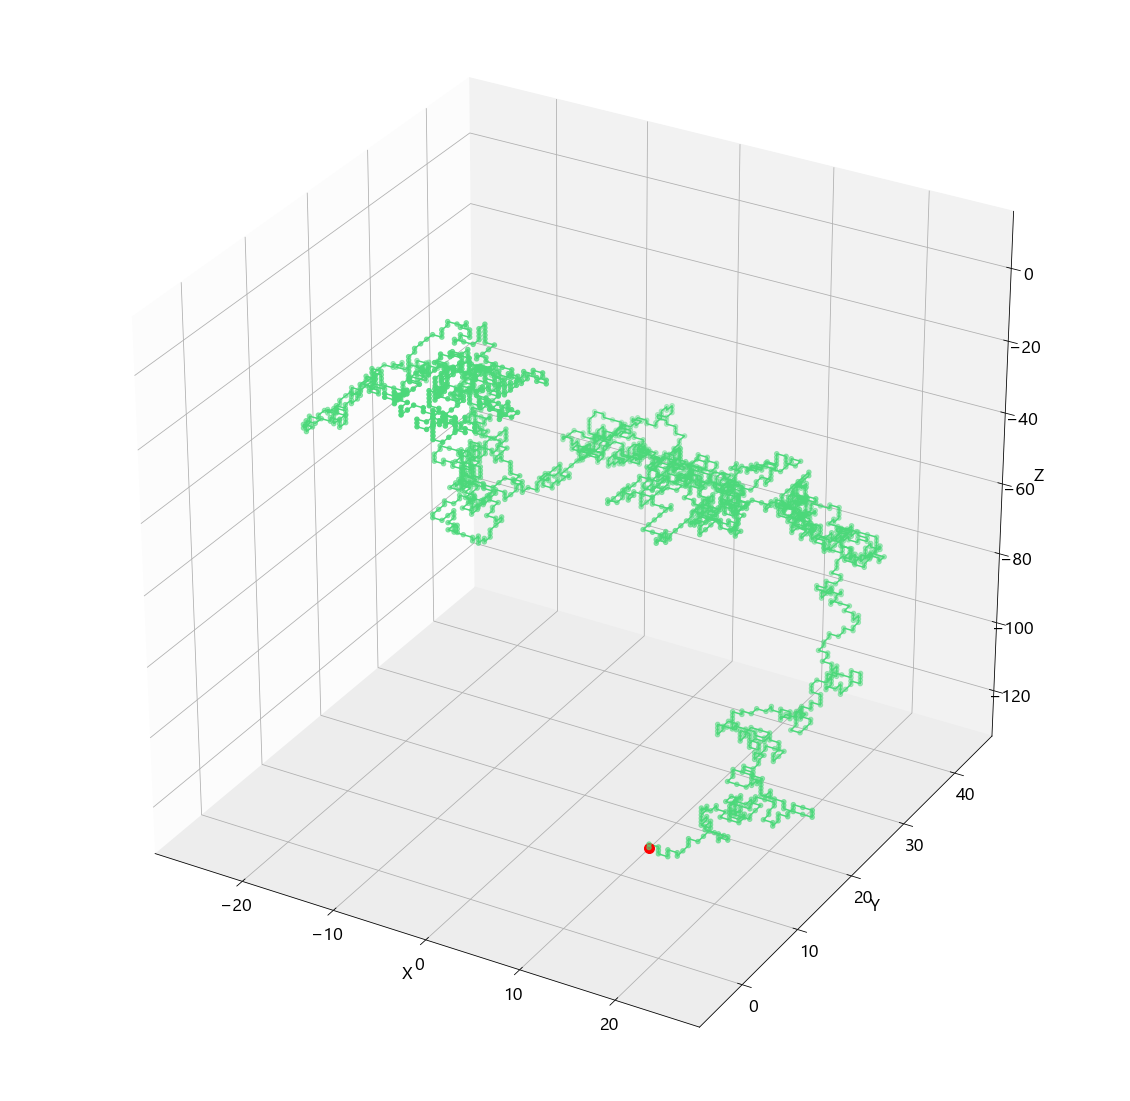

In [181]:
font = {'family' : 'Segoe UI',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
fin_coord = coord[len(coord)-1]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.99, 0.99, 0.99, 1.0))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.w_zaxis.set_pane_color((0.93, 0.93, 0.93, 1.0))

coord = np.array(coord)

ax.scatter(coord[:,0], coord[:,1], coord[:,2], marker='o', color='#4cd87a')
ax.plot(coord[:,0], coord[:,1], coord[:,2], color='#4cd87a')
ax.scatter(fin_coord[0], fin_coord[1], fin_coord[2], s=100, marker='o', color='red')
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


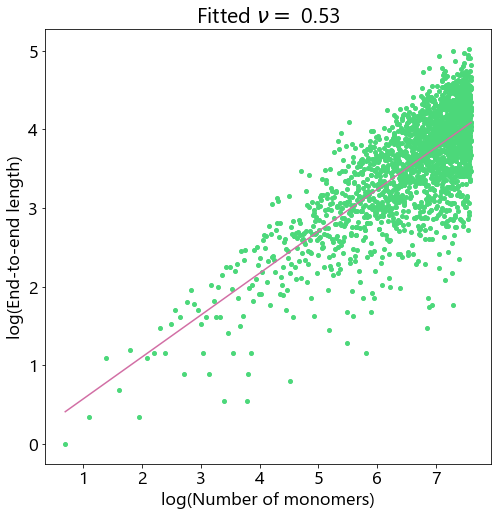

In [182]:
flatten_N = np.array(list(chain.from_iterable(N))) #make a 1D list out of list of lists
flatten_R = np.array(list(chain.from_iterable(R)))
m, b = np.polyfit(flatten_N, flatten_R, 1) #fit the data by the linear function
font = {'family' : 'Segoe UI',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)


plt.figure (figsize=(8,8))
plt.plot(N, R, '.', color='#4cd87a', markersize = 8)
plt.plot(flatten_N, m*flatten_N + b, '#d26fa5')

plt.xlabel('log(Number of monomers)') 
plt.ylabel('log(End-to-end length)')
plt.title(r'Fitted $\nu=$ %.2f'%m)

plt.show()